In [1]:
using CSV, 
    DataFrames, 
    Statistics, 
    StatsBase, 
    Plots, 
    Distances, 
    Unitful,
    NaNMath,
    Optim,
    StatsPlots
    
include("TrajectoryEntropy.jl");

In [2]:
trajectory_data = CSV.read("example_data/trajectory1.csv", DataFrame)

Row,marker,x_pos,y_pos,z_pos,msec,active
,Int64,Float64,Float64,Float64,Float64,Int64
1,1,0.002145,-0.707101,-0.731567,5.37384,0
2,1,0.002574,-0.706057,-0.711611,5.23642,0
3,1,0.003094,-0.706172,-0.708656,5.37152,0
4,1,0.00274,-0.705866,-0.696344,5.3755,0
5,1,0.002631,-0.705723,-0.691055,5.25166,0
6,1,0.003239,-0.705801,-0.694029,5.37616,0
7,1,0.003139,-0.705957,-0.699564,5.37053,0
8,1,0.003042,-0.706164,-0.705992,5.25497,0
9,1,0.002835,-0.706364,-0.711113,5.37748,0


In [3]:
filter!(row -> row[:active] == 1, trajectory_data)

Row,marker,x_pos,y_pos,z_pos,msec,active
,Int64,Float64,Float64,Float64,Float64,Int64
1,1,-0.004068,-0.625726,-0.476278,5.37682,1
2,1,-0.004277,-0.624114,-0.468782,5.25066,1
3,1,-0.004942,-0.621826,-0.450159,5.36788,1
4,1,-0.004985,-0.619864,-0.467682,5.37417,1
5,1,-0.006503,-0.616804,-0.447426,5.25232,1
6,1,-0.006053,-0.613692,-0.414204,5.37252,1
7,1,-0.006518,-0.611225,-0.389492,5.37616,1
8,1,-0.008425,-0.608033,-0.372614,5.24868,1
9,1,-0.008672,-0.60642,-0.377916,5.3755,1


In [4]:
# keep only positions where y is less than a critical value
critical_y = -0.1
filter!(row -> row[:y_pos] < critical_y, trajectory_data)

# reset data to start point 0,0
x_positions = trajectory_data.x_pos .- trajectory_data.x_pos[1]
y_positions = trajectory_data.y_pos .- trajectory_data.y_pos[1]

# if last x position is negative, flip all x positions
if x_positions[end] < 0
    x_positions = -1 * x_positions
end

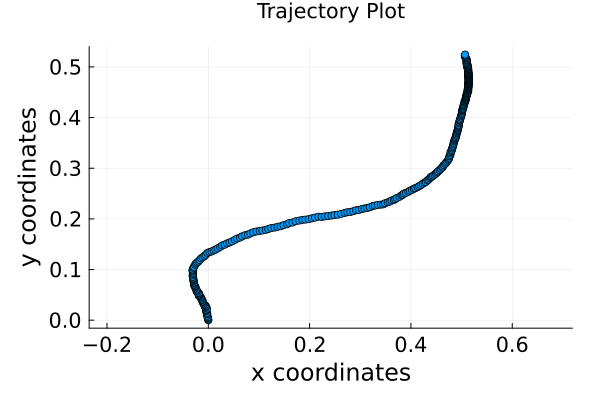

In [5]:
traj_plot = Plots.plot(x_positions, y_positions,
                       seriestype = :scatter, 
                       xlabel = "x coordinates", 
                       ylabel = "y coordinates", 
                       xguidefont = font(16, halign = :center, valign = :center, color = :black, rotation = 0), 
                       yguidefont = font(16, halign = :center, valign = :center, color = :black, rotation = 0), 
                       title = "Trajectory Plot", 
                       legend = false, 
                       #xlims = (-.05, .40),
                       #ylims = (-.05, .40), 
                       #xticks = -.5:.5:.5,
                       margin = 5Plots.mm,
                       tickfont = font(14), # change x-tick label size
                       ytickfont = font(14),
                       aspect_ratio = 1 
                          )

In [8]:
# perform TEA analysis

#-------- TEA Options
tea_options = Dict(
    "sa_binsize_min" => 12,
    "sa_binsize_max" => 20,
    "sa_binsize_step" => 2,
    "verbose" => true,
    "maxInner" => 25000,
    "maxOuter" => 50,
    "maxFunEvals" => 25000,
    "unique_algorithm" => "julia",
    "unique_tol" => 0.01,
    "decompose" => true
);

In [9]:
tea(x_positions, y_positions, tea_options; binHist = 22, plot = false, verbose = true, decompose = true)

Dict{String, Any} with 25 entries:
  "psi"       => 2.07117
  "penalty"   => 2.35782e6
  "xHist"     => 0.0:0.14272727272727273:3.14
  "tau_star"  => [0.0243216, 0.0253442, 0.166846, 0.474165, 0.998643, 1.0, 1.0,…
  "csi"       => 0.548074
  "tau"       => [0.0243216, 0.00102255, 0.141502, 0.307319, 0.524478, 0.596934…
  "hist_plot" => 0
  "theta"     => [1.44186, 1.35034, 1.41562, 1.30436, 1.40732, 1.40342, 1.32934…
  "u1_star"   => [6.05545e-6, 1.2882e-5, 0.573948, 0.829263, 0.976506, 1.0, 1.0…
  "U2"        => [0, 0, 0, 0, 24, 20, 13, 0, 0, 0, 0]
  "u1"        => [6.05545e-6, 6.82659e-6, 0.573935, 0.255315, 0.147244, 0.10116…
  "pi_tea"    => [1.0e-99, 1.0e-99, 1.0e-99, 1.0e-99, 1.0e-99, 1.0e-99, 1.0e-99…
  "lambda2"   => [1.0e-99, 1.0e-99, 1.0e-99, 1.0e-99, 1.0, 1.0, 1.0, 1.0e-99, 1…
  "U1"        => [0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0]
  "zeta1"     => 0.75345
  "u2"        => [0.00110881, 0.165083, 0.169336, 0.41757, 0.57587, 0.253427, 0…
  "zeta"      => 1.52307
  "H_theta0"  => [0